In [1]:
import torch
from torchvision import models
import timm
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns
from torchsummary import summary
import os
import torch.nn as nn
import tqdm


e:\Rijan_Shrestha\AI\AI Works\ai_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Intersection  9.0
Union  23.0
IoU 0.391304347826087


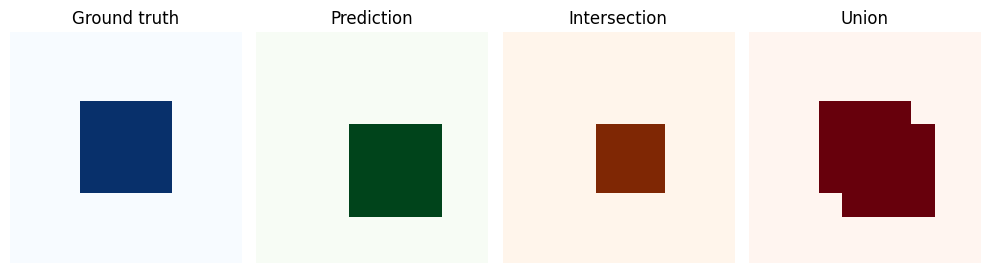

In [3]:
#Understanding Intersection over Union Concept
ground_truth = torch.zeros(10, 10)
ground_truth[3:7, 3:7] = 1

prediction = torch.zeros(10, 10)
prediction[4:8, 4:8] = 1

intersection = (ground_truth * prediction).sum().item()
union = (ground_truth + prediction).clamp(0, 1).sum().item()
iou = intersection/union

print("Intersection ", intersection)
print("Union ", union)
print("IoU", iou)

#Visualization of the IoU
fig, axes = plt.subplots(1, 4, figsize = (10, 4))

axes[0].imshow(ground_truth, cmap = "Blues", vmin = 0, vmax = 1)
axes[0].set_title("Ground truth")
axes[0].axis('off')

axes[1].imshow(prediction, cmap = "Greens", vmin = 0, vmax = 1)
axes[1].set_title("Prediction")
axes[1].axis('off')

axes[2].imshow(ground_truth * prediction, cmap = "Oranges", vmin = 0, vmax = 1)
axes[2].set_title("Intersection")
axes[2].axis('off')

axes[3].imshow((ground_truth + prediction).clamp(0,1), cmap = "Reds", vmin = 0, vmax = 1)
axes[3].set_title("Union")
axes[3].axis('off')

plt.tight_layout()
plt.show()